# ROC vs PRC

# ROC : fallout과 recall간의 상관관계에서 그 기준치(threshold)값의 변화에 따라 어떻게 상관관계가 달라지는지 표현한 그래프.
# 데이터의 양이 충분하고, 분류하고자 하는 각 클래스들의 데이터 양이 비슷할때 사용

# PRC : recalll과 precision간의 상관관계를 나타낸 그래프로 threshold의 변화에 따른 상관관계의 변화를 표현한 그래프.
# 상대적으로 양이 적고 클래스들간의 데이터 양이 불균형할때 사용

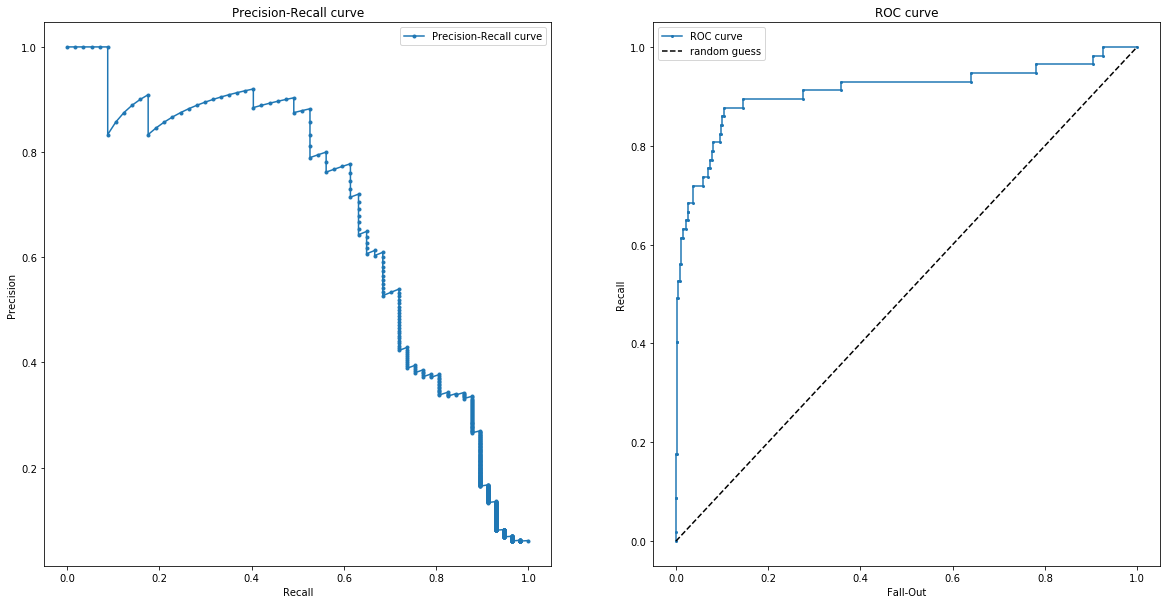

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

LR = LogisticRegression().fit(X, y)
y_pred = LR.predict(X)


fpr, tpr, roc_thresholds = roc_curve(y, LR.decision_function(X))
precision, recall, prc_thresholds = precision_recall_curve(y, LR.decision_function(X))

f1, auc = f1_score(y, y_pred), auc(recall, precision)

#print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

plt.figure(figsize = (20,10))
plt.subplot(121)
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()

plt.subplot(122)
plt.plot(fpr, tpr, 'o-', ms=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend()
plt.show()